<a href="https://colab.research.google.com/github/junduk123/Machine-Learning-Task/blob/main/Task11/heart_diseaset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Membaca dataset heart disease
file_path = "C:/Users/mhafi/Downloads/heart.csv"  # Ganti dengan lokasi file Anda
data = pd.read_csv(file_path)

C:\Users\mhafi\AppData\Local\Temp\ipykernel_19476\1251058537.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette='viridis')


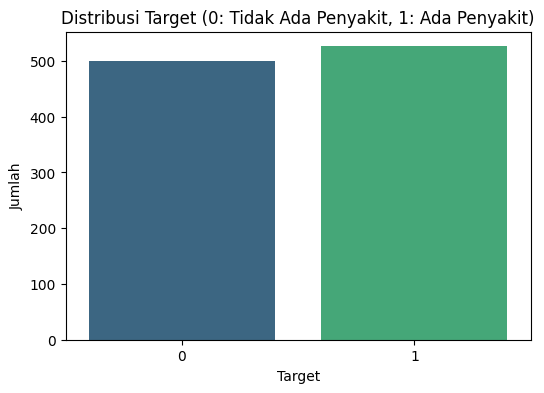

In [ ]:
# 1. Exploratory Data Analysis (EDA)
# Visualisasi distribusi target
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data, palette='viridis')
plt.title('Distribusi Target (0: Tidak Ada Penyakit, 1: Ada Penyakit)')
plt.xlabel('Target')
plt.ylabel('Jumlah')
plt.show()

C:\Users\mhafi\AppData\Local\Temp\ipykernel_19476\21372367.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data, palette='husl')


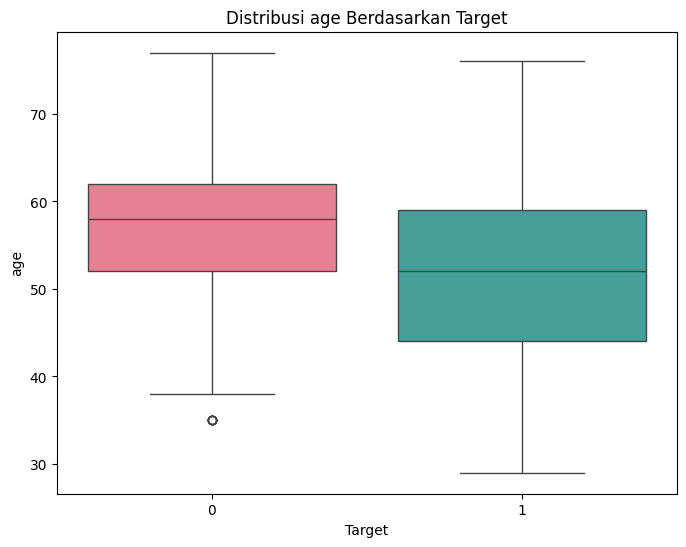

C:\Users\mhafi\AppData\Local\Temp\ipykernel_19476\21372367.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data, palette='husl')


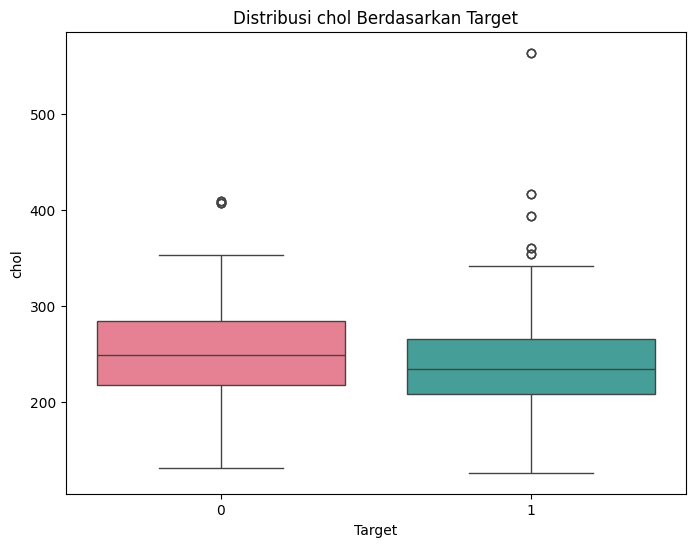

C:\Users\mhafi\AppData\Local\Temp\ipykernel_19476\21372367.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data, palette='husl')


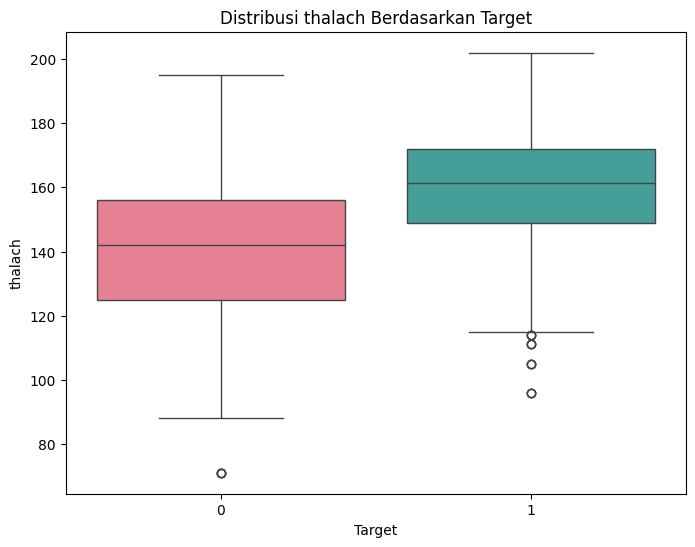

C:\Users\mhafi\AppData\Local\Temp\ipykernel_19476\21372367.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data, palette='husl')


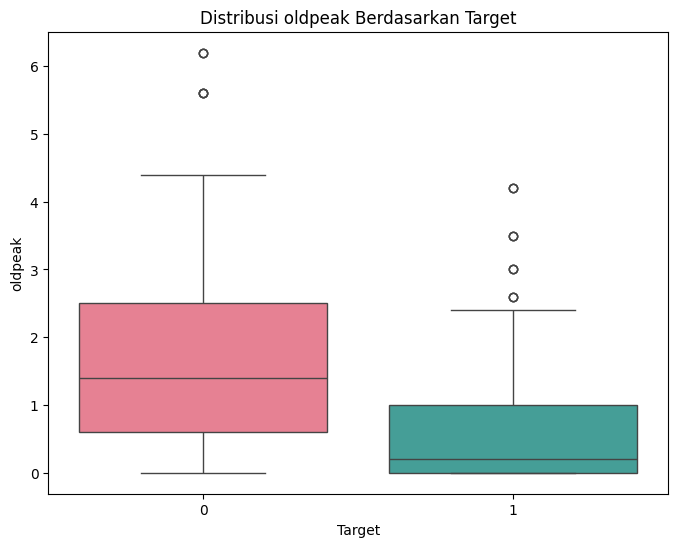

In [ ]:
# Visualisasi distribusi fitur utama terhadap target
key_features = ['age', 'chol', 'thalach', 'oldpeak']
for feature in key_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='target', y=feature, data=data, palette='husl')
    plt.title(f'Distribusi {feature} Berdasarkan Target')
    plt.xlabel('Target')
    plt.ylabel(feature)
    plt.show()

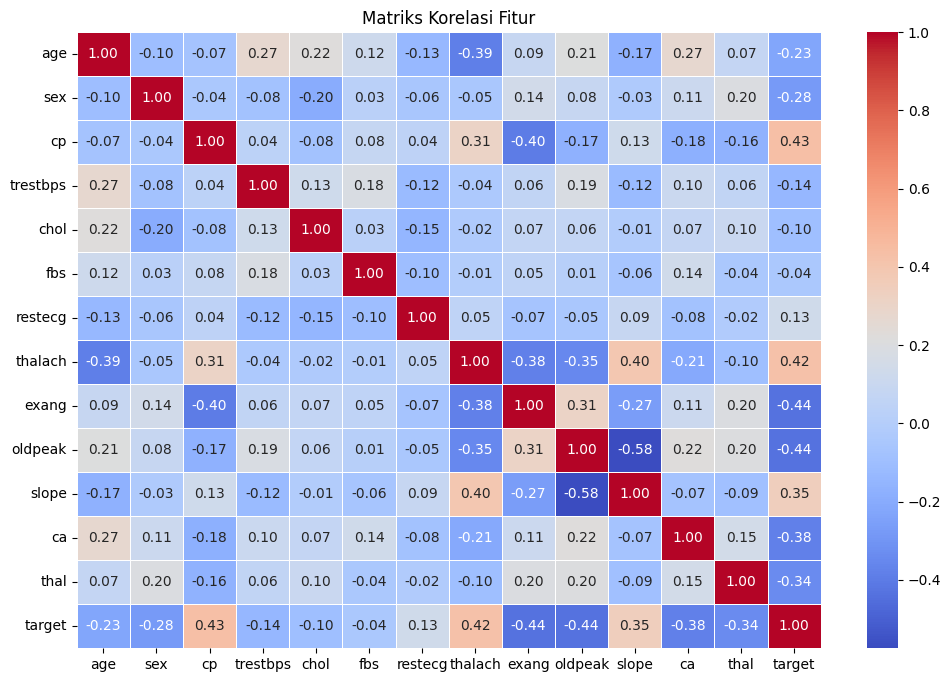

In [ ]:
# Visualisasi korelasi antar fitur
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Fitur')
plt.show()

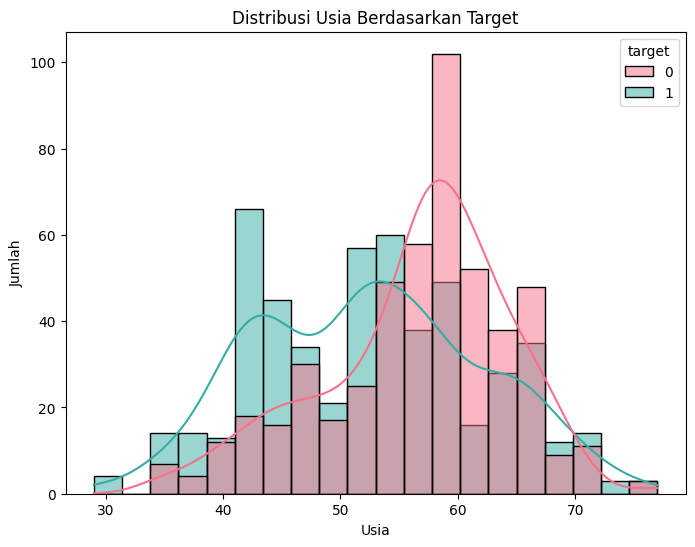

In [ ]:
# Visualisasi distribusi usia berdasarkan target
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='age', hue='target', kde=True, palette='husl', bins=20)
plt.title('Distribusi Usia Berdasarkan Target')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
# 2. Data Preprocessing
# Memisahkan fitur dan target
X = data.drop(columns='target').values
y = data['target'].values

# Normalisasi data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Mengonversi data ke tensor PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [ ]:
# 3. Definisi Model MLP
class HeartDiseaseMLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, activation_function):
        super(HeartDiseaseMLP, self).__init__()
        layers = []
        in_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(in_size, hidden_size))
            if activation_function == 'relu':
                layers.append(nn.ReLU())
            elif activation_function == 'sigmoid':
                layers.append(nn.Sigmoid())
            elif activation_function == 'tanh':
                layers.append(nn.Tanh())
            elif activation_function == 'linear':
                layers.append(nn.Identity())
            elif activation_function == 'softmax':
                layers.append(nn.Softmax(dim=1))
            in_size = hidden_size
        layers.append(nn.Linear(in_size, 2))  # Output layer (2 classes)
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

In [ ]:
# 4. Hyperparameter Experimentation
input_size = X_train.shape[1]
hidden_layer_options = [[4], [8, 16], [32, 64, 128]]  # 1, 2, 3 hidden layers
activation_functions = ['linear', 'sigmoid', 'relu', 'softmax', 'tanh']
learning_rates = [10, 1, 0.1, 0.01, 0.001, 0.0001]
batch_sizes = [16, 32, 64, 128, 256, 512]
epoch_options = [1, 10, 25, 50, 100, 250]

results = []  # Untuk menyimpan hasil

In [ ]:
# Iterasi seluruh kombinasi hyperparameter
for hidden_sizes in hidden_layer_options:
    for activation_function in activation_functions:
        for learning_rate in learning_rates:
            for batch_size in batch_sizes:
                for selected_epochs in epoch_options:
                    print(f"\nConfig: Hidden Sizes={hidden_sizes}, Activation={activation_function}, LR={learning_rate}, Batch Size={batch_size}, Epochs={selected_epochs}")

                    # Inisialisasi model
                    model = HeartDiseaseMLP(input_size, hidden_sizes, activation_function)

                    # Optimizer dan loss function
                    criterion = nn.CrossEntropyLoss()
                    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

                    # DataLoader untuk batch size
                    train_loader = torch.utils.data.DataLoader(
                        list(zip(X_train_tensor, y_train_tensor)), batch_size=batch_size, shuffle=True
                    )

                    # Training loop
                    losses = []
                    for epoch in range(selected_epochs):
                        model.train()
                        for X_batch, y_batch in train_loader:
                            optimizer.zero_grad()  # Menghapus gradien sebelumnya
                            outputs = model(X_batch)  # Forward pass
                            loss = criterion(outputs, y_batch)  # Menghitung loss
                            loss.backward()  # Backward pass
                            optimizer.step()  # Memperbarui parameter

                        losses.append(loss.item())

                        # Menampilkan loss per epoch
                        if (epoch + 1) % 10 == 0 or epoch == selected_epochs - 1:
                            print(f"Epoch [{epoch + 1}/{selected_epochs}], Loss: {loss.item():.4f}")

                    # Evaluasi Model
                    model.eval()
                    with torch.no_grad():
                        y_pred_test = model(X_test_tensor).argmax(axis=1).numpy()
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                    # Menyimpan hasil untuk visualisasi
                    results.append({
                        'hidden_sizes': hidden_sizes,
                        'activation_function': activation_function,
                        'learning_rate': learning_rate,
                        'batch_size': batch_size,
                        'epochs': selected_epochs,
                        'test_accuracy': test_accuracy,
                        'losses': losses
                    })



Config: Hidden Sizes=[4], Activation=linear, LR=10, Batch Size=16, Epochs=1
Epoch [1/1], Loss: 139.2479

Config: Hidden Sizes=[4], Activation=linear, LR=10, Batch Size=16, Epochs=10
Epoch [10/10], Loss: 1450.7126

Config: Hidden Sizes=[4], Activation=linear, LR=10, Batch Size=16, Epochs=25
Epoch [10/25], Loss: 705.5184
Epoch [20/25], Loss: 110.4664
Epoch [25/25], Loss: 0.0000

Config: Hidden Sizes=[4], Activation=linear, LR=10, Batch Size=16, Epochs=50
Epoch [10/50], Loss: 849.3307
Epoch [20/50], Loss: 0.0000
Epoch [30/50], Loss: 0.0000
Epoch [40/50], Loss: 361.0502
Epoch [50/50], Loss: 40.3886

Config: Hidden Sizes=[4], Activation=linear, LR=10, Batch Size=16, Epochs=100
Epoch [10/100], Loss: 965.8617
Epoch [20/100], Loss: 0.0000
Epoch [30/100], Loss: 130.2045
Epoch [40/100], Loss: 0.0000
Epoch [50/100], Loss: 43.4383
Epoch [60/100], Loss: 544.6836
Epoch [70/100], Loss: 12.8359
Epoch [80/100], Loss: 249.6960
Epoch [90/100], Loss: 72.4375
Epoch [100/100], Loss: 0.0000

Config: Hidden 

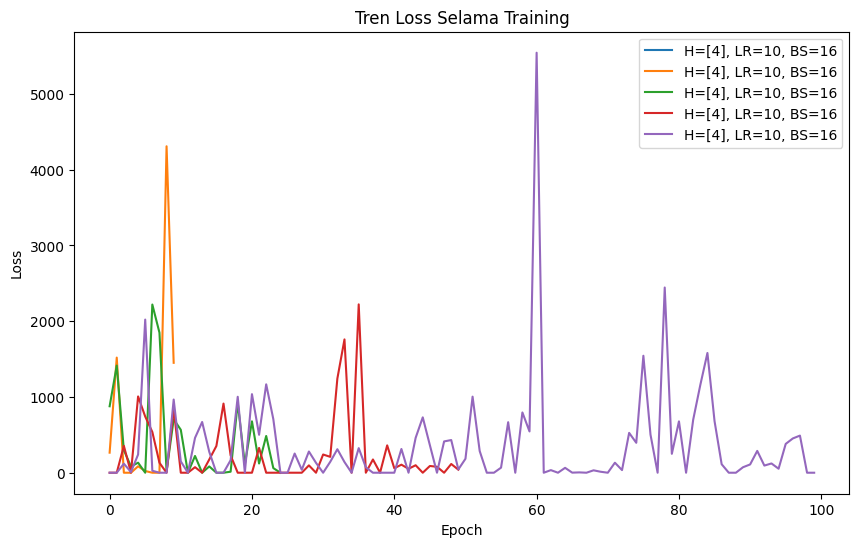

In [ ]:
# 5. Visualisasi Akhir
# Menampilkan tren loss untuk konfigurasi tertentu
plt.figure(figsize=(10, 6))
for result in results[:5]:  # Contoh visualisasi 5 konfigurasi pertama
    plt.plot(result['losses'], label=f"H={result['hidden_sizes']}, LR={result['learning_rate']}, BS={result['batch_size']}")
plt.title('Tren Loss Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Menampilkan 5 konfigurasi terbaik
top_5_results = sorted(results, key=lambda x: x['test_accuracy'], reverse=True)[:5]

print("Konfigurasi Terbaik:")
for i, result in enumerate(top_4_results, start=1):
    print(f"{i}. {result}")


Konfigurasi Terbaik:
1. {'hidden_sizes': [8, 16], 'activation_function': 'sigmoid', 'learning_rate': 0.1, 'batch_size': 256, 'epochs': 100, 'test_accuracy': 1.0, 'losses': [0.8199719786643982, 0.4990418553352356, 0.42337384819984436, 0.5109887719154358, 0.46567803621292114, 0.25893375277519226, 0.2710573375225067, 0.24406228959560394, 0.25722113251686096, 0.22698195278644562, 0.4204169511795044, 0.1978597342967987, 0.3588469326496124, 0.40763866901397705, 0.16375356912612915, 0.16716624796390533, 0.34316837787628174, 0.30404630303382874, 0.3972579538822174, 0.3623049855232239, 0.18323960900306702, 0.21334208548069, 0.3084985315799713, 0.29389989376068115, 0.2272777259349823, 0.243711456656456, 0.30669716000556946, 0.2384590357542038, 0.14251084625720978, 0.1261499524116516, 0.1682882159948349, 0.13930022716522217, 0.12316957116127014, 0.2800976037979126, 0.13161104917526245, 0.24531036615371704, 0.1743657886981964, 0.12927772104740143, 0.19412747025489807, 0.2122703194618225, 0.2596269

In [ ]:
# Menampilkan distribusi akurasi berdasarkan batch size dan learning rate
plt.figure(figsize=(12, 6))
batch_sizes = [r['batch_size'] for r in results]
accuracies = [r['test_accuracy'] for r in results]
sns.boxplot(x=batch_sizes, y=accuracies)
plt.title('Distribusi Akurasi Berdasarkan Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Akurasi')
plt.show()

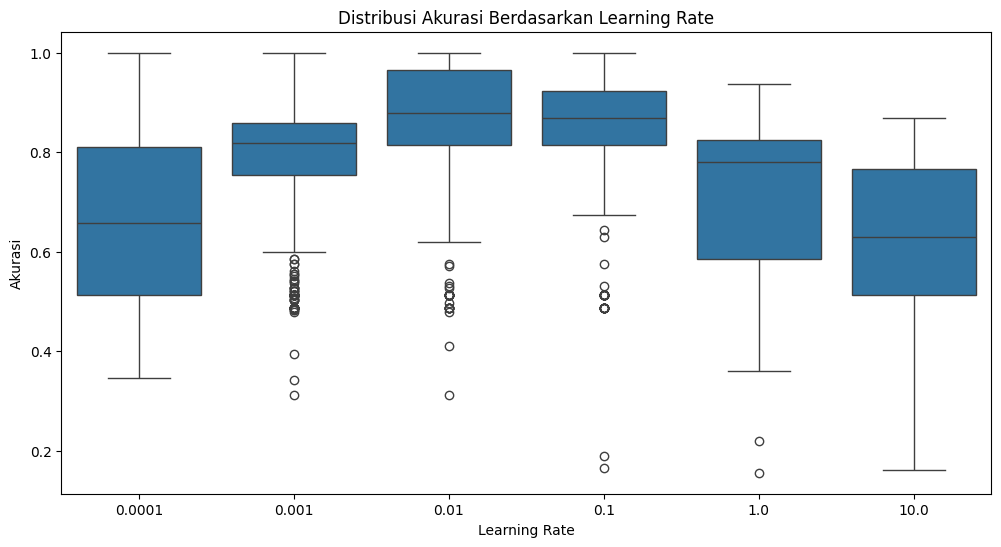

In [ ]:
plt.figure(figsize=(12, 6))
learning_rates = [r['learning_rate'] for r in results]
sns.boxplot(x=learning_rates, y=accuracies)
plt.title('Distribusi Akurasi Berdasarkan Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Akurasi')
plt.show()